In [ ]:
import pandas as pd
import numpy as np
import networkx as nx

In [ ]:
# Load the dataset
df = pd.read_csv("/content/table_1 (1).csv")  # Replace with actual file path

# Convert illumination columns to numeric (removing '%' signs if present)
df["Best Case Illumination (%)"] = df["Best Case Illumination (%)"].astype(str).str.rstrip('%').astype(float)
df["Worst Case Illumination (%)"] = df["Worst Case Illumination (%)"].astype(str).str.rstrip('%').astype(float)

# Identify the top 4 markers based on BOTH highest worst-case and best-case illumination
top_markers = df.nlargest(4, ["Worst Case Illumination (%)", "Best Case Illumination (%)"])

# Display the result
print(top_markers)


  Site Code Area Code  Latitude (Degrees)  Longitude (Degrees)  Height (km)  \
1       2RS      D-SR              -89.93               129.07         2.11   
6       7RS      D-SR              -88.91               129.87         1.77   
7       8RS      D-SR              -88.91               129.87         1.77   
5       6RS      A-SR              -89.17                92.36         1.44   

   Reference X  Reference Y  Worst Case Slow (Hours)  Worst Case Fast (Hours)  \
1          893          903                      129                       72   
6          943          936                      149                      111   
7          943          936                      261                      111   
5          944          936                      249                      100   

   Worst Case Illumination (%)  Best Case Slow (Hours)  \
1                         69.0                       1   
6                         65.0                      25   
7                       

In [ ]:
df.head()

,Site Code,Area Code,Latitude (Degrees),Longitude (Degrees),Height (km),Reference X,Reference Y,Worst Case Slow (Hours),Worst Case Fast (Hours),Worst Case Illumination (%),Best Case Slow (Hours),Best Case Fast (Hours),Best Case Illumination (%)
0,1RS,A-SR,-89.87,237.53,1.65,895,904,232,65,58.0,23,23,94.0
1,2RS,D-SR,-89.93,129.07,2.11,893,903,129,72,69.0,1,1,100.0
2,3RS,A-SR,-89.94,300.96,1.65,898,899,242,67,57.0,21,13,97.0
3,4RS,A-SR,-89.90,210.91,1.98,910,911,213,71,53.0,19,14,99.0
4,5RS,A-SR,-89.37,129.92,1.48,925,921,252,98,54.0,23,23,95.0


In [ ]:
# prompt: import linear regression

from sklearn.linear_model import LinearRegression

# Assuming 'Worst Case Illumination (%)' is your independent variable (x)
# and 'Best Case Illumination (%)' is your dependent variable (y)

X = df[['Latitude (Degrees)', 'Longitude (Degrees)']]
y = df['Worst Case Illumination (%)']
z = df['Best Case Illumination (%)']

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
model1 = LinearRegression()
model1.fit(X, z)

LinearRegression()

In [ ]:
# Load the dataset
df = pd.read_csv("/content/table_1 (1).csv")  # Replace with actual file path

# Convert illumination columns to numeric (removing '%' signs if present)
df["Best Case Illumination (%)"] = df["Best Case Illumination (%)"].astype(str).str.rstrip('%').astype(float)
df["Worst Case Illumination (%)"] = df["Worst Case Illumination (%)"].astype(str).str.rstrip('%').astype(float)

# Identify the top 4 markers based on BOTH highest worst-case and best-case illumination
top_markers = df.nlargest(4, ["Worst Case Illumination (%)", "Best Case Illumination (%)"])

# Parameters for synthetic data generation
num_points_per_marker = 30  # Generate 30 points per marker
lat_variation = 0.01  # Latitude variation
lon_variation = 0.01  # Longitude variation

# Generate synthetic data points
synthetic_data = []
for _, row in top_markers.iterrows():
    for _ in range(num_points_per_marker):
        synthetic_data.append({
            "Site Code": row["Site Code"],
            "Latitude (Degrees)": row["Latitude (Degrees)"] + np.random.uniform(-lat_variation, lat_variation),
            "Longitude (Degrees)": row["Longitude (Degrees)"] + np.random.uniform(-lon_variation, lon_variation)
        })

# Convert to DataFrame
df_synthetic = pd.DataFrame(synthetic_data)

# Save the synthetic dataset
df_synthetic.to_csv("synthetic_dataset.csv", index=False)

# Display the first few rows
print(df_synthetic.head())


  Site Code  Latitude (Degrees)  Longitude (Degrees)
0       2RS          -89.927246           129.067590
1       2RS          -89.923641           129.068632
2       2RS          -89.924132           129.068106
3       2RS          -89.939295           129.069496
4       2RS          -89.928946           129.077125


In [ ]:
# prompt: write code to add column of Best and Worst case scenarios for illumination using model, model1 to predict these values for the synthetic dataset

# Predict best and worst case illumination for synthetic data
X_synthetic = df_synthetic[['Latitude (Degrees)', 'Longitude (Degrees)']]
df_synthetic['Worst Case Illumination (%)'] = model.predict(X_synthetic)
df_synthetic['Best Case Illumination (%)'] = model1.predict(X_synthetic)

# Display the synthetic dataset with predictions
print(df_synthetic.head())


  Site Code  Latitude (Degrees)  Longitude (Degrees)  \
0       2RS          -89.927246           129.067590   
1       2RS          -89.923641           129.068632   
2       2RS          -89.924132           129.068106   
3       2RS          -89.939295           129.069496   
4       2RS          -89.928946           129.077125   

   Worst Case Illumination (%)  Best Case Illumination (%)  
0                    63.086031                   99.520922  
1                    63.077426                   99.517705  
2                    63.078612                   99.518152  
3                    63.114590                   99.531554  
4                    63.089718                   99.522220  


In [ ]:
# Load the dataset
df_synthetic1 = pd.read_csv("synthetic_dataset.csv")

# Predict best and worst case illumination for synthetic data
X_synthetic = df_synthetic1[['Latitude (Degrees)', 'Longitude (Degrees)']]
df_synthetic1['Worst Case Illumination (%)'] = model.predict(X_synthetic)
df_synthetic1['Best Case Illumination (%)'] = model1.predict(X_synthetic)

# Display the synthetic dataset with predictions
print(df_synthetic1.head())


  Site Code  Latitude (Degrees)  Longitude (Degrees)  \
0       2RS          -89.927246           129.067590   
1       2RS          -89.923641           129.068632   
2       2RS          -89.924132           129.068106   
3       2RS          -89.939295           129.069496   
4       2RS          -89.928946           129.077125   

   Worst Case Illumination (%)  Best Case Illumination (%)  
0                    63.086031                   99.520922  
1                    63.077426                   99.517705  
2                    63.078612                   99.518152  
3                    63.114590                   99.531554  
4                    63.089718                   99.522220  


In [ ]:
df_synthetic1.head()

,Site Code,Latitude (Degrees),Longitude (Degrees),Worst Case Illumination (%),Best Case Illumination (%)
0,2RS,-89.927246,129.067590,63.086031,99.520922
1,2RS,-89.923641,129.068632,63.077426,99.517705
2,2RS,-89.924132,129.068106,63.078612,99.518152
3,2RS,-89.939295,129.069496,63.114590,99.531554
4,2RS,-89.928946,129.077125,63.089718,99.522220


In [ ]:
# Create a graph
G = nx.Graph()

# Add nodes based on latitude, longitude, and illumination
for _, row in df_synthetic.iterrows():
    G.add_node((row["Latitude (Degrees)"], row["Longitude (Degrees)"]), illumination=row["Best Case Illumination (%)"])

# Add edges based on distance and illumination
for i, row1 in df_synthetic.iterrows():
    for j, row2 in df_synthetic.iterrows():
        if i != j:
            distance = np.sqrt((row1["Latitude (Degrees)"] - row2["Latitude (Degrees)"])**2 +
                               (row1["Longitude (Degrees)"] - row2["Longitude (Degrees)"])**2)
            avg_illumination = (row1["Best Case Illumination (%)"] + row2["Best Case Illumination (%)"]) / 2
            # Use 1/avg_illumination or a similar transformation to ensure positive weights
            G.add_edge((row1["Latitude (Degrees)"], row1["Longitude (Degrees)"]),
                       (row2["Latitude (Degrees)"], row2["Longitude (Degrees)"]),
                       weight=1/avg_illumination,  # Use inverse of illumination for weight, ensuring positive values
                       distance=distance)




#Function to determine paths with maximum illumination within each site
def find_optimal_paths(df):
    optimal_paths = []
    for site_code in df["Site Code"].unique():
        site_points = df[df["Site Code"] == site_code]
        if not site_points.empty:
            source = (site_points.iloc[0]["Latitude (Degrees)"], site_points.iloc[0]["Longitude (Degrees)"])
            for _, target_row in site_points.iterrows():
                target = (target_row["Latitude (Degrees)"], target_row["Longitude (Degrees)"])
                if source != target:
                    try:
                        path = nx.shortest_path(G, source=source, target=target, weight='weight')
                        # Convert numpy.float64 to standard float
                        cleaned_path = [(float(lat), float(lon)) for lat, lon in path]
                        optimal_paths.append((site_code, source, target, cleaned_path))
                    except nx.NetworkXNoPath:
                        continue
    return optimal_paths

# Find paths within each site
optimal_paths_within_sites = find_optimal_paths(df_synthetic)

# Find paths between sites (connecting different site codes)
site_centroids = df_synthetic.groupby("Site Code")[["Latitude (Degrees)", "Longitude (Degrees)"]].mean()
site_pairs = [(s1, s2) for i, s1 in enumerate(site_centroids.index) for s2 in site_centroids.index if i < site_centroids.index.get_loc(s2)]

optimal_paths_between_sites = []
for s1, s2 in site_pairs:
    # Get the nearest nodes to the centroids
    source = tuple(df_synthetic.loc[(df_synthetic['Site Code'] == s1)][['Latitude (Degrees)', 'Longitude (Degrees)']].iloc[0])
    target = tuple(df_synthetic.loc[(df_synthetic['Site Code'] == s2)][['Latitude (Degrees)', 'Longitude (Degrees)']].iloc[0])

    try:
        path = nx.shortest_path(G, source=source, target=target, weight='weight')
        optimal_paths_between_sites.append((s1, s2, path))
    except nx.NetworkXNoPath:
        continue

# Display a few sample paths
print("Sample paths within sites:")
for path in optimal_paths_within_sites[:100]:
    print(f"Site: {path[0]}, Source: {path[1]}, Target: {path[2]}, Path: {path[3]}")

print("\nSample paths between sites:")
for path in optimal_paths_between_sites[:6]:
    print(f"From Site {path[0]} to Site {path[1]}, Path: {path[2]}")

Sample paths within sites:
Site: 2RS, Source: (np.float64(-89.92724633747729), np.float64(129.06758998398772)), Target: (-89.92364098236816, 129.06863219604168), Path: [(-89.92724633747729, 129.06758998398772), (-89.92364098236816, 129.06863219604168)]
Site: 2RS, Source: (np.float64(-89.92724633747729), np.float64(129.06758998398772)), Target: (-89.92413209405325, 129.0681061419473), Path: [(-89.92724633747729, 129.06758998398772), (-89.92413209405325, 129.0681061419473)]
Site: 2RS, Source: (np.float64(-89.92724633747729), np.float64(129.06758998398772)), Target: (-89.93929491718325, 129.06949640072304), Path: [(-89.92724633747729, 129.06758998398772), (-89.93929491718325, 129.06949640072304)]
Site: 2RS, Source: (np.float64(-89.92724633747729), np.float64(129.06758998398772)), Target: (-89.92894556533028, 129.0771246508769), Path: [(-89.92724633747729, 129.06758998398772), (-89.92894556533028, 129.0771246508769)]
Site: 2RS, Source: (np.float64(-89.92724633747729), np.float64(129.067589

In [ ]:
import pandas as pd

# Create a list to store the data for the CSV file
illumination_data = []

# Assuming optimal_paths_within_sites is already defined from the previous code
for path in optimal_paths_within_sites[:100]:  # Limit to the first 100 paths
    illumination_data.append({
        'Site Code': path[0],
        'Source': path[1],
        'Target': path[2],
        'Path': path[3]
    })

# Create a Pandas DataFrame
illumination_df = pd.DataFrame(illumination_data)

# Save the DataFrame to a CSV file
illumination_df.to_csv('illumination_paths.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.linear_model import LinearRegression

In [ ]:
data2 = pd.read_csv('/content/table_2_final.csv')
data2.head()

,Site Code,Area,Latitude (Degrees),Longitude (Degrees),Height (km),Reference X,Reference Y,Worst Case Slow (Hours),Worst Case Fast (Hours),Worst Case Avg Illumination,Best Case Slow (Hours),Best Case Fast (Hours),Best Case Avg Illumination
0,1CS,A-SC,-89.91,207.90,4.02,896,910,39,28,93%,32,32,100%
1,2CS,B-SC,-89.91,205.35,4.10,892,910,43,28,92%,32,32,100%
2,3CS,A-SC,-89.91,285.07,4.10,853,887,45,39,91%,32,32,100%
3,4CS,B-SC,-89.91,285.07,4.10,853,907,43,39,91%,32,32,100%
4,5CS,A-SC,-89.04,219.95,2.54,853,908,52,52,73%,37,66,91%


In [ ]:
data2["Worst Case Avg Illumination"] = data2["Worst Case Avg Illumination"].astype(str).str.rstrip('%').astype(float)
data2["Best Case Avg Illumination"] = data2["Best Case Avg Illumination"].astype(str).str.rstrip('%').astype(float)

X1 = data2[['Latitude (Degrees)','Longitude (Degrees)']]
y1 = data2['Worst Case Avg Illumination']
z1 = data2['Best Case Avg Illumination']

model2 = LinearRegression()
model2.fit(X1, y1)

LinearRegression()

In [ ]:
model3 = LinearRegression()
model3.fit(X1, z1)

LinearRegression()

In [ ]:
X_synthetic = df_synthetic1[['Latitude (Degrees)', 'Longitude (Degrees)']]
df_synthetic1['Worst Case Avg Illumination '] = model2.predict(X_synthetic)
df_synthetic1['Best Case Avg Illumination'] = model3.predict(X_synthetic)

# Display the synthetic dataset with predictions
print(df_synthetic1.head())

  Site Code  Latitude (Degrees)  Longitude (Degrees)  \
0       2RS          -89.927246           129.067590   
1       2RS          -89.923641           129.068632   
2       2RS          -89.924132           129.068106   
3       2RS          -89.939295           129.069496   
4       2RS          -89.928946           129.077125   

   Worst Case Illumination (%)  Best Case Illumination (%)  \
0                    63.086031                   99.520922   
1                    63.077426                   99.517705   
2                    63.078612                   99.518152   
3                    63.114590                   99.531554   
4                    63.089718                   99.522220   

   Worst Case Avg Illumination   Best Case Avg Illumination  
0                     74.620287                   93.779345  
1                     74.593393                   93.768469  
2                     74.597052                   93.769938  
3                     74.710230           

In [ ]:
df_synthetic1.shape

(120, 7)

In [ ]:
import pandas as pd
# Assuming df_synthetic1 is already created in your previous code cells
# If not, you need to run the code to create it first.
# Then, you can download the DataFrame as a CSV file
from google.colab import files
df_synthetic1.to_csv('df_synthetic1.csv', encoding = 'utf-8-sig')
files.download('df_synthetic1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load the illumination paths data
illumination_df = pd.read_csv('illumination_paths123.csv')

# Load the synthetic dataset with predictions
df_synthetic1 = pd.read_csv('df_synthetic1.csv')

# Function to predict illumination for a given path
def predict_illumination(path):
    # Placeholder for actual prediction logic - replace with your desired prediction method
    # For example, you can calculate the average illumination along the path
    total_illumination = 0
    for lat, lon in path:
        # Find the nearest point in df_synthetic1
        df_synthetic1['distance'] = ((df_synthetic1['Latitude (Degrees)'] - lat)**2 +
                                      (df_synthetic1['Longitude (Degrees)'] - lon)**2)**0.5
        nearest_point = df_synthetic1.loc[df_synthetic1['distance'].idxmin()]
        total_illumination += nearest_point['Best Case Avg Illumination'] # Or use 'Worst Case Avg Illumination '
    return total_illumination / len(path) if len(path) > 0 else 0


# Apply the function to create the new column
illumination_df['Predicted Illumination'] = illumination_df['Path'].apply(lambda x: predict_illumination(eval(x)))

# Display the updated DataFrame
print(illumination_df.head())

# Save the updated DataFrame to a new CSV file
illumination_df.to_csv('illumination_paths_with_predictions.csv', index=False)


  Site Code Target Code                                    Source  \
0       2RS         2RS  (-89.93034652912108, 129.06968320061668)   
1       2RS         2RS  (-89.93034652912108, 129.06968320061668)   
2       2RS         2RS  (-89.93034652912108, 129.06968320061668)   
3       2RS         2RS  (-89.93034652912108, 129.06968320061668)   
4       2RS         2RS  (-89.93034652912108, 129.06968320061668)   

                                     Target  \
0  (-89.93093850666062, 129.06620389061817)   
1   (-89.93280020841878, 129.0629543282326)   
2  (-89.93867699201154, 129.06706678073408)   
3  (-89.92811306497228, 129.07558827259638)   
4  (-89.92143170241246, 129.06421377109956)   

                                                Path  Predicted Illumination  
0  ((-89.93034652912108, 129.06968320061668), (-8...               93.786694  
1  ((-89.93034652912108, 129.06968320061668), (-8...               93.793652  
2  ((-89.93034652912108, 129.06968320061668), (-8...             

In [ ]:
data = {
    'Source Site': ['2RS', '2RS', '2RS', '6RS', '6RS', '7RS'],
    'Target Site': ['6RS', '7RS', '8RS', '7RS', '8RS', '8RS'],
    'Path': [
        [(-89.92285362088872, 129.07445813959353), (-89.1693859981991, 92.35306180684965)],
        [(-89.92285362088872, 129.07445813959353), (-88.90376000231106, 129.865481222352)],
        [(-89.92285362088872, 129.07445813959353), (-88.91734517422033, 129.87909975576468)],
        [(-89.1693859981991, 92.35306180684965), (-88.90376000231106, 129.865481222352)],
        [(-89.1693859981991, 92.35306180684965), (-88.91734517422033, 129.87909975576468)],
        [(-88.90376000231106, 129.865481222352), (-88.91734517422033, 129.87909975576468)]
    ]
}

df_paths = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_paths.to_csv('inter_paths.csv', index=False)



In [ ]:
# prompt: seperate the illummination_paths_with_prediction into 4 parts, 1 each of 2cs, 6cs, 7cs, 8cs

import pandas as pd

# Load the data
illumination_df = pd.read_csv('illumination_paths_with_predictions.csv')

# Separate paths based on source and target sites
paths_2cs = illumination_df[illumination_df['Site Code'] == '2RS']
paths_6cs = illumination_df[illumination_df['Site Code'] == '6RS']
paths_7cs = illumination_df[illumination_df['Site Code'] == '7RS']
paths_8cs = illumination_df[illumination_df['Site Code'] == '8RS']

# Save each group to a separate CSV file
paths_2cs.to_csv('illumination_paths_2cs.csv', index=False)
paths_6cs.to_csv('illumination_paths_6cs.csv', index=False)
paths_7cs.to_csv('illumination_paths_7cs.csv', index=False)
paths_8cs.to_csv('illumination_paths_8cs.csv', index=False)


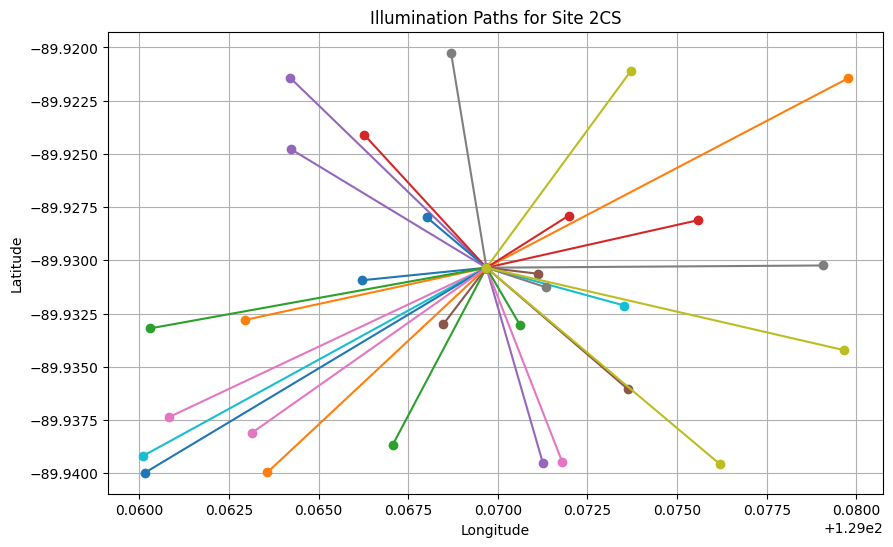

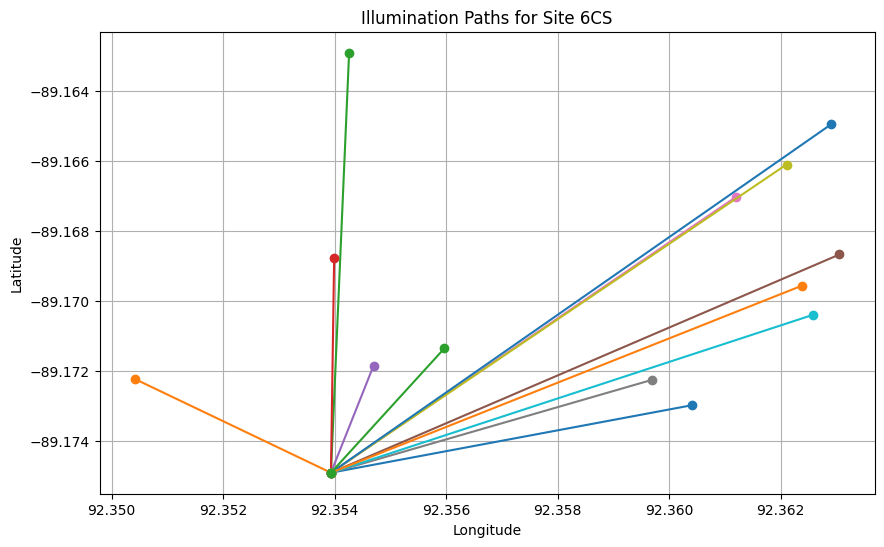

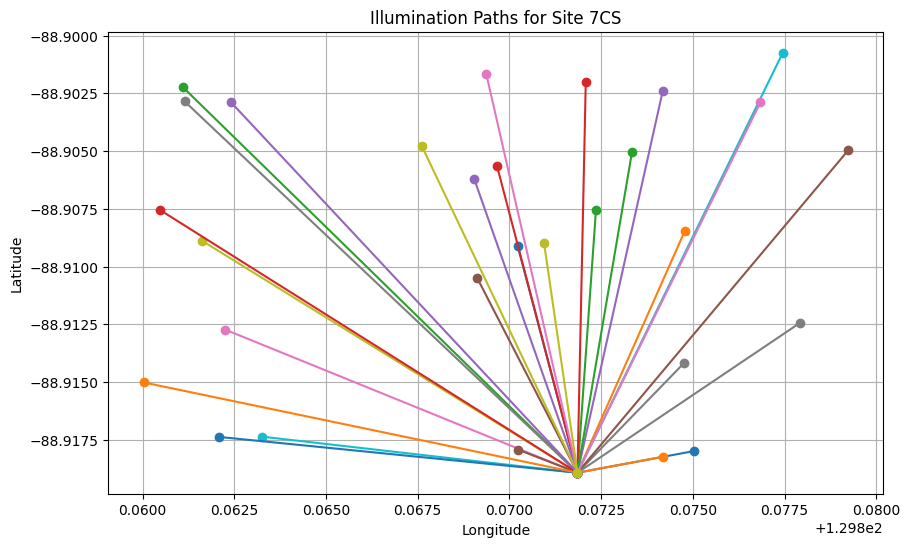

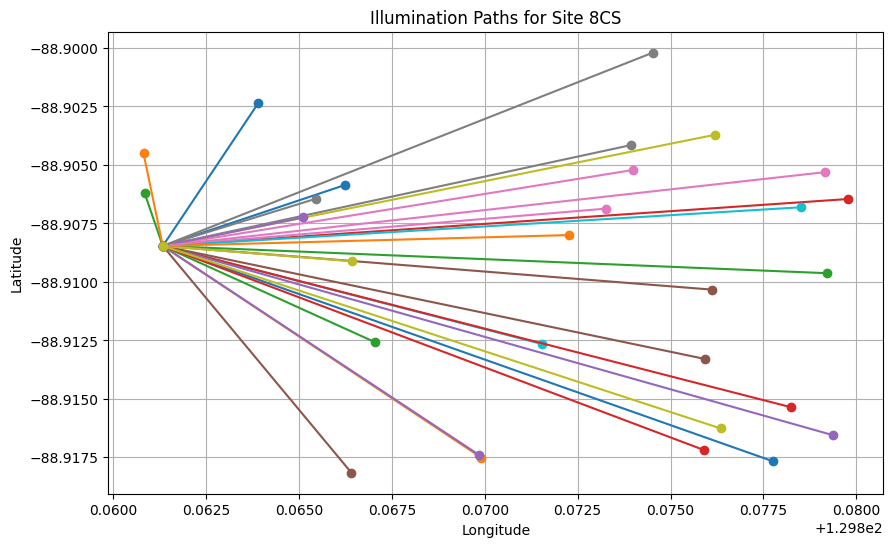

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
illumination_paths_2cs = pd.read_csv('illumination_paths_2cs.csv')
illumination_paths_6cs = pd.read_csv('illumination_paths_6cs.csv')
illumination_paths_7cs = pd.read_csv('illumination_paths_7cs.csv')
illumination_paths_8cs = pd.read_csv('illumination_paths_8cs.csv')


def plot_paths(df, title):
    plt.figure(figsize=(10, 6))
    for index, row in df.iterrows():
        path = eval(row['Path'])  # Convert the string representation of the path to a list of tuples
        lats, lons = zip(*path)  # Extract latitude and longitude
        plt.plot(lons, lats, marker='o', linestyle='-')  # Plot the path

    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(title)
    plt.grid(True)
    plt.show()

# Plot paths for each site
plot_paths(illumination_paths_2cs, "Illumination Paths for Site 2CS")
plot_paths(illumination_paths_6cs, "Illumination Paths for Site 6CS")
plot_paths(illumination_paths_7cs, "Illumination Paths for Site 7CS")
plot_paths(illumination_paths_8cs, "Illumination Paths for Site 8CS")


In [ ]:
# prompt: make a dataset named lights_energy with 2 columns, SiteCode and Predicted_illumination_SiteCode
# SiteCodes: 2rs, 6rs,7rs,8rs
# Predicted_illumination_SiteCode: average illumination of 2rs, 6rs, 7rs, 8rs

import pandas as pd

# Create the dataset
data = {
    'SiteCode': ['2RS', '6RS', '7RS', '8RS'],
    'Predicted_illumination_SiteCode': [93.78746, 90.73694,90.72365, 90.29922]  # Replace with actual average illuminations
}
lights_energy = pd.DataFrame(data)

# Display the dataset
print(lights_energy)

# Save the dataset to a CSV file (optional)
lights_energy.to_csv('lights_energy.csv', index=False)


  SiteCode  Predicted_illumination_SiteCode
0      2RS                         93.78746
1      6RS                         90.73694
2      7RS                         90.72365
3      8RS                         90.29922


In [ ]:
inter_path = pd.read_csv('inter_paths123 (1) (1).csv')
inter_path.head()

,Source Site,Target Site,Path,Path_bracket,SourceX,SourceY,TargetX,TargetY,Predicted_illumination
0,2RS,6RS,"[(-89.92285362088872, 129.07445813959353), (-8...","-89.92285362088872, 129.07445813959353, -89.16...",-89.922854,129.074458,-89.169386,92.353062,92.262200
1,2RS,7RS,"[(-89.92285362088872, 129.07445813959353), (-8...","-89.92285362088872, 129.07445813959353, -88.90...",-89.922854,129.074458,-88.903760,129.865481,92.255555
2,2RS,8RS,"[(-89.92285362088872, 129.07445813959353), (-8...","-89.92285362088872, 129.07445813959353, -88.91...",-89.922854,129.074458,-88.917345,129.879100,92.043340
3,6RS,7RS,"[(-89.1693859981991, 92.35306180684965), (-88....","-89.1693859981991, 92.35306180684965, -88.9037...",-89.169386,92.353062,-88.903760,129.865481,90.730295
4,6RS,8RS,"[(-89.1693859981991, 92.35306180684965), (-88....","-89.1693859981991, 92.35306180684965, -88.9173...",-89.169386,92.353062,-88.917345,129.879100,90.518080


In [ ]:
inter_path['absorbed_illumination'] = 0.50*inter_path['Predicted_illumination']

In [ ]:
inter_path.head()

,Source Site,Target Site,Path,Path_bracket,SourceX,SourceY,TargetX,TargetY,Predicted_illumination,absorbed_illumination
0,2RS,6RS,"[(-89.92285362088872, 129.07445813959353), (-8...","-89.92285362088872, 129.07445813959353, -89.16...",-89.922854,129.074458,-89.169386,92.353062,92.262200,46.131100
1,2RS,7RS,"[(-89.92285362088872, 129.07445813959353), (-8...","-89.92285362088872, 129.07445813959353, -88.90...",-89.922854,129.074458,-88.903760,129.865481,92.255555,46.127778
2,2RS,8RS,"[(-89.92285362088872, 129.07445813959353), (-8...","-89.92285362088872, 129.07445813959353, -88.91...",-89.922854,129.074458,-88.917345,129.879100,92.043340,46.021670
3,6RS,7RS,"[(-89.1693859981991, 92.35306180684965), (-88....","-89.1693859981991, 92.35306180684965, -88.9037...",-89.169386,92.353062,-88.903760,129.865481,90.730295,45.365147
4,6RS,8RS,"[(-89.1693859981991, 92.35306180684965), (-88....","-89.1693859981991, 92.35306180684965, -88.9173...",-89.169386,92.353062,-88.917345,129.879100,90.518080,45.259040


In [ ]:
illumination = pd.read_csv("/content/illumination_paths_with_predictions.csv")
illumination.head()

,Site Code,Target Code,Source,Target,Path,Predicted Illumination
0,2RS,2RS,"(-89.93034652912108, 129.06968320061668)","(-89.93093850666062, 129.06620389061817)","((-89.93034652912108, 129.06968320061668), (-8...",93.786694
1,2RS,2RS,"(-89.93034652912108, 129.06968320061668)","(-89.93280020841878, 129.0629543282326)","((-89.93034652912108, 129.06968320061668), (-8...",93.793652
2,2RS,2RS,"(-89.93034652912108, 129.06968320061668)","(-89.93867699201154, 129.06706678073408)","((-89.93034652912108, 129.06968320061668), (-8...",93.800516
3,2RS,2RS,"(-89.93034652912108, 129.06968320061668)","(-89.92811306497228, 129.07558827259638)","((-89.93034652912108, 129.06968320061668), (-8...",93.782346
4,2RS,2RS,"(-89.93034652912108, 129.06968320061668)","(-89.92143170241246, 129.06421377109956)","((-89.93034652912108, 129.06968320061668), (-8...",93.772287


In [ ]:
illumination['absorbed_illumination'] = 0.50*illumination['Predicted Illumination']

In [ ]:
illumination.head()

,Site Code,Target Code,Source,Target,Path,Predicted Illumination,absorbed_illumination
0,2RS,2RS,"(-89.93034652912108, 129.06968320061668)","(-89.93093850666062, 129.06620389061817)","((-89.93034652912108, 129.06968320061668), (-8...",93.786694,46.893347
1,2RS,2RS,"(-89.93034652912108, 129.06968320061668)","(-89.93280020841878, 129.0629543282326)","((-89.93034652912108, 129.06968320061668), (-8...",93.793652,46.896826
2,2RS,2RS,"(-89.93034652912108, 129.06968320061668)","(-89.93867699201154, 129.06706678073408)","((-89.93034652912108, 129.06968320061668), (-8...",93.800516,46.900258
3,2RS,2RS,"(-89.93034652912108, 129.06968320061668)","(-89.92811306497228, 129.07558827259638)","((-89.93034652912108, 129.06968320061668), (-8...",93.782346,46.891173
4,2RS,2RS,"(-89.93034652912108, 129.06968320061668)","(-89.92143170241246, 129.06421377109956)","((-89.93034652912108, 129.06968320061668), (-8...",93.772287,46.886143


In [ ]:
# prompt: use th illumination_paths_with_prediction.csv file to find 4 paths with maximum illumination for each site, i.e 16 total points

# Find the top 4 paths with the maximum predicted illumination for each site
top_paths_per_site = illumination.groupby('Site Code').apply(lambda x: x.nlargest(4, 'Predicted Illumination'))

# Display the result
print("Top 4 paths with maximum illumination for each site:")
print(top_paths_per_site)

# You can access the paths for a specific site like this:
# top_paths_site_2cs = top_paths_per_site.loc['2RS']
# print("\nTop 4 paths for Site 2RS:")
# print(top_paths_site_2cs)

# If you want a flattened list of all 16 paths
all_top_paths = top_paths_per_site.reset_index(drop=True)
print("\nAll top 16 paths:")
all_top_paths


Top 4 paths with maximum illumination for each site:
             Site Code Target Code                                    Source  \
Site Code                                                                      
2RS       6        2RS         2RS  (-89.93034652912108, 129.06968320061668)   
          9        2RS         2RS  (-89.93034652912108, 129.06968320061668)   
          10       2RS         2RS  (-89.93034652912108, 129.06968320061668)   
          11       2RS         2RS  (-89.93034652912108, 129.06968320061668)   
6RS       87       6RS         6RS   (-89.17490565487742, 92.35393589476001)   
          88       6RS         6RS   (-89.17490565487742, 92.35393589476001)   
          92       6RS         6RS   (-89.17490565487742, 92.35393589476001)   
          96       6RS         6RS   (-89.17490565487742, 92.35393589476001)   
7RS       49       7RS         7RS   (-88.91892447251024, 129.8718542384806)   
          39       7RS         7RS   (-88.91892447251024, 129.87185

<ipython-input-189-4450eaa07473>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_paths_per_site = illumination.groupby('Site Code').apply(lambda x: x.nlargest(4, 'Predicted Illumination'))


,Site Code,Target Code,Source,Target,Path,Predicted Illumination,absorbed_illumination
0,2RS,2RS,"(-89.93034652912108, 129.06968320061668)","(-89.93736460708482, 129.06083293226789)","((-89.93034652912108, 129.06968320061668), (-8...",93.801042,46.900521
1,2RS,2RS,"(-89.93034652912108, 129.06968320061668)","(-89.93918176238796, 129.06011591193894)","((-89.93034652912108, 129.06968320061668), (-8...",93.801042,46.900521
2,2RS,2RS,"(-89.93034652912108, 129.06968320061668)","(-89.93997913925385, 129.0601583606228)","((-89.93034652912108, 129.06968320061668), (-8...",93.801042,46.900521
3,2RS,2RS,"(-89.93034652912108, 129.06968320061668)","(-89.93996635406793, 129.06357201068752)","((-89.93034652912108, 129.06968320061668), (-8...",93.801042,46.900521
4,6RS,6RS,"(-89.17490565487742, 92.35393589476001)","(-89.17297316749628, 92.36041966345076)","((-89.17490565487742, 92.35393589476001), (-89...",90.303512,45.151756
5,6RS,6RS,"(-89.17490565487742, 92.35393589476001)","(-89.17222597627968, 92.35041907114356)","((-89.17490565487742, 92.35393589476001), (-89...",90.302319,45.151160
6,6RS,6RS,"(-89.17490565487742, 92.35393589476001)","(-89.1686656720053, 92.36305654779414)","((-89.17490565487742, 92.35393589476001), (-89...",90.301610,45.150805
7,6RS,6RS,"(-89.17490565487742, 92.35393589476001)","(-89.17039414985244, 92.36257616624161)","((-89.17490565487742, 92.35393589476001), (-89...",90.301610,45.150805
8,7RS,7RS,"(-88.91892447251024, 129.8718542384806)","(-88.9173726126573, 129.86207470998605)","((-88.91892447251024, 129.8718542384806), (-88...",90.754324,45.377162
9,7RS,7RS,"(-88.91892447251024, 129.8718542384806)","(-88.91798982040464, 129.87501849471235)","((-88.91892447251024, 129.8718542384806), (-88...",90.753373,45.376687


In [ ]:
# prompt: make it into a dataset

import pandas as pd
# Assuming 'all_top_paths' is the DataFrame containing the top 16 paths

# Create a new DataFrame for the dataset
dataset = pd.DataFrame(all_top_paths)

# Display the first few rows of the dataset
print(dataset.head())

# Save the dataset to a CSV file
dataset.to_csv('top_16_paths_dataset.csv', index=False)


  Site Code Target Code                                    Source  \
0       2RS         2RS  (-89.93034652912108, 129.06968320061668)   
1       2RS         2RS  (-89.93034652912108, 129.06968320061668)   
2       2RS         2RS  (-89.93034652912108, 129.06968320061668)   
3       2RS         2RS  (-89.93034652912108, 129.06968320061668)   
4       6RS         6RS   (-89.17490565487742, 92.35393589476001)   

                                     Target  \
0  (-89.93736460708482, 129.06083293226789)   
1  (-89.93918176238796, 129.06011591193894)   
2   (-89.93997913925385, 129.0601583606228)   
3  (-89.93996635406793, 129.06357201068752)   
4   (-89.17297316749628, 92.36041966345076)   

                                                Path  Predicted Illumination  \
0  ((-89.93034652912108, 129.06968320061668), (-8...               93.801042   
1  ((-89.93034652912108, 129.06968320061668), (-8...               93.801042   
2  ((-89.93034652912108, 129.06968320061668), (-8...          

In [ ]:
top_df = pd.read_csv('/content/top_16_paths_dataset.csv')

# Separate paths based on source and target sites
top_2cs = top_df[top_df['Site Code'] == '2RS']
top_6cs = top_df[top_df['Site Code'] == '6RS']
top_7cs = top_df[top_df['Site Code'] == '7RS']
top_8cs = top_df[top_df['Site Code'] == '8RS']

# Save each group to a separate CSV file
top_2cs.to_csv('top_2cs.csv', index=False)
top_6cs.to_csv('top_6cs.csv', index=False)
top_7cs.to_csv('top_7cs.csv', index=False)
top_8cs.to_csv('top_8cs.csv', index=False)

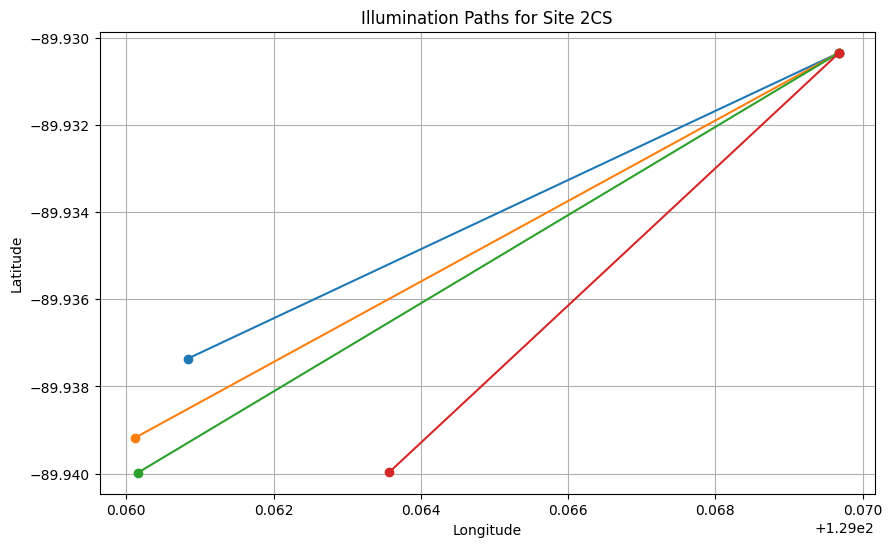

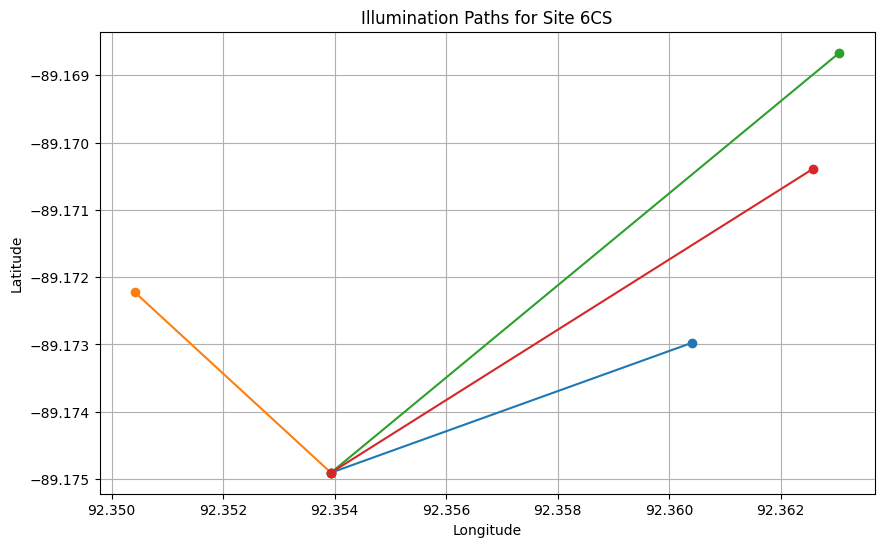

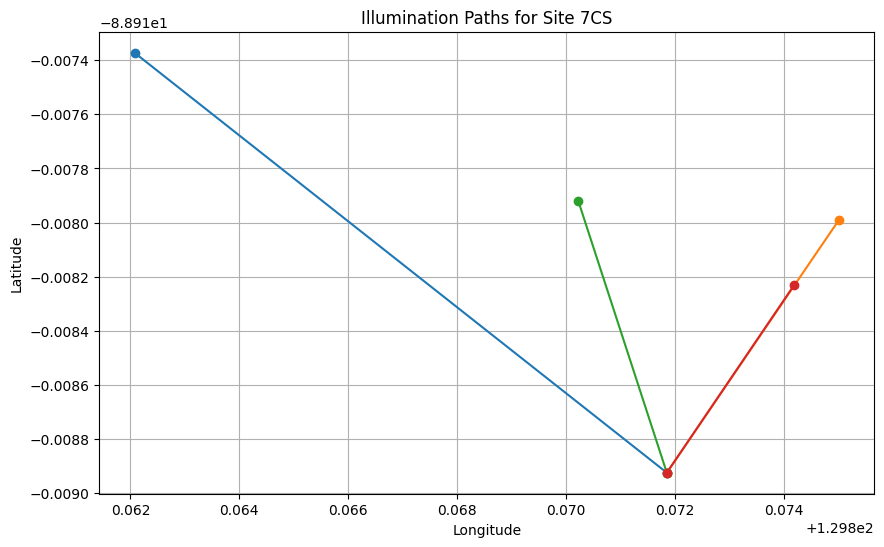

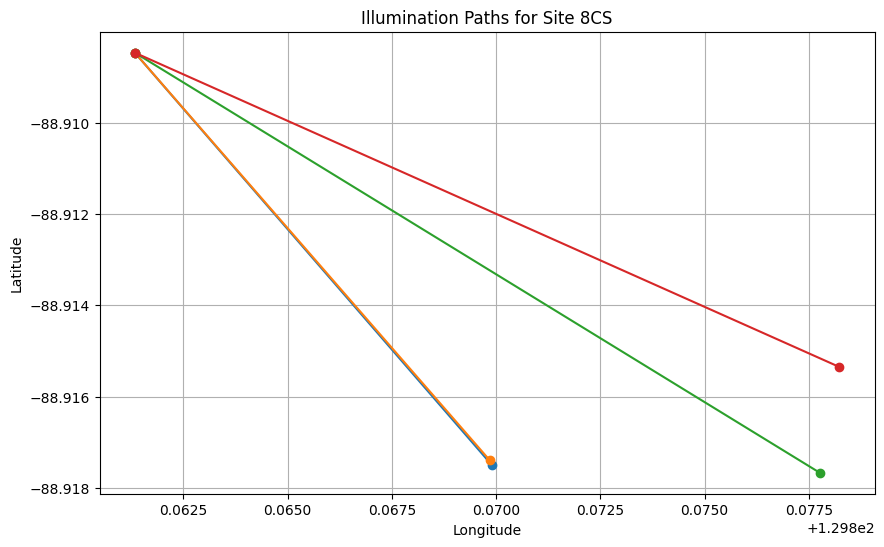

In [ ]:
# Load the data
top_2cs = pd.read_csv('top_2cs.csv')
top_6cs = pd.read_csv('top_6cs.csv')
top_7cs = pd.read_csv('top_7cs.csv')
top_8cs = pd.read_csv('top_8cs.csv')


def plot_paths(df, title):
    plt.figure(figsize=(10, 6))
    for index, row in df.iterrows():
        path = eval(row['Path'])  # Convert the string representation of the path to a list of tuples
        lats, lons = zip(*path)  # Extract latitude and longitude
        plt.plot(lons, lats, marker='o', linestyle='-')  # Plot the path

    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(title)
    plt.grid(True)
    plt.show()

# Plot paths for each site
plot_paths(top_2cs, "Illumination Paths for Site 2CS")
plot_paths(top_6cs, "Illumination Paths for Site 6CS")
plot_paths(top_7cs, "Illumination Paths for Site 7CS")
plot_paths(top_8cs, "Illumination Paths for Site 8CS")


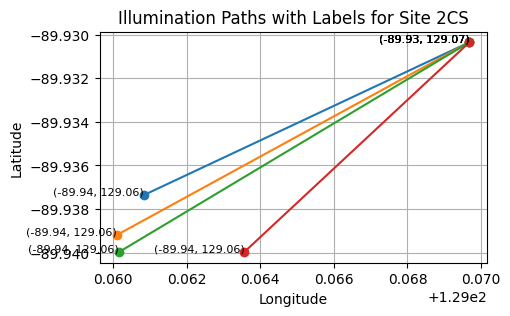

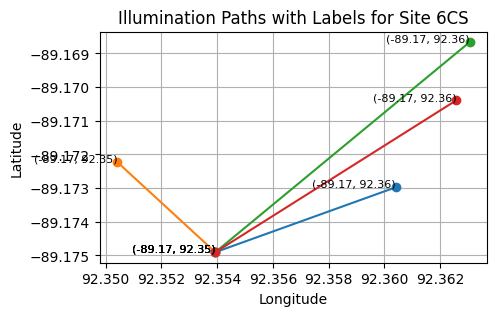

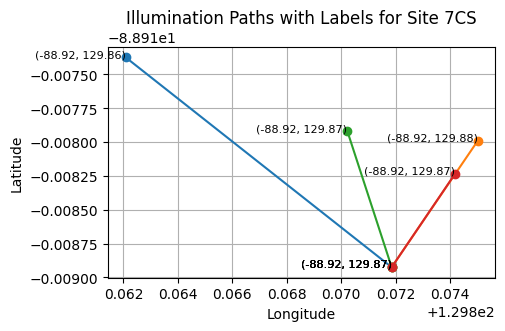

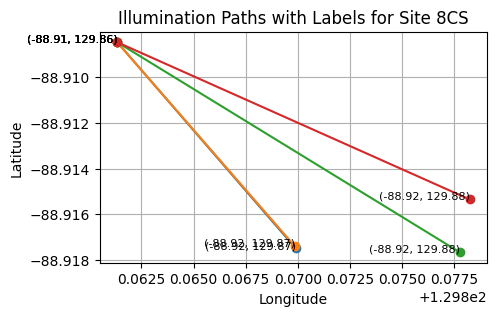

In [ ]:
# prompt: label each and every point in the graph with it's coordinates

import matplotlib.pyplot as plt
def plot_paths_with_labels(df, title):
    plt.figure(figsize=(5, 3))
    for index, row in df.iterrows():
        path = eval(row['Path'])  # Convert the string representation of the path to a list of tuples
        lats, lons = zip(*path)  # Extract latitude and longitude
        plt.plot(lons, lats, marker='o', linestyle='-')  # Plot the path
        # Add labels for each point
        for i in range(len(lats)):
            plt.text(lons[i], lats[i], f'({lats[i]:.2f}, {lons[i]:.2f})', fontsize=8, ha='right')

    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(title)
    plt.grid(True)
    plt.show()

# Plot paths with labels for each site
plot_paths_with_labels(top_2cs, "Illumination Paths with Labels for Site 2CS")
plot_paths_with_labels(top_6cs, "Illumination Paths with Labels for Site 6CS")
plot_paths_with_labels(top_7cs, "Illumination Paths with Labels for Site 7CS")
plot_paths_with_labels(top_8cs, "Illumination Paths with Labels for Site 8CS")

In [ ]:
from google.colab import files

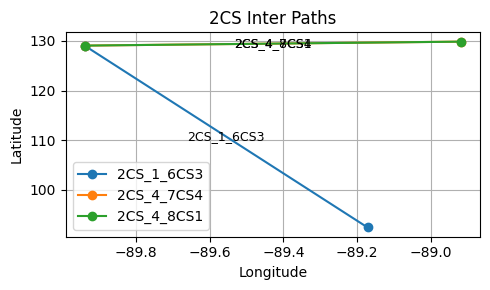

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt

# Data: Each path with target coordinates and corresponding label
paths = {
    "2CS_1_6CS3": {
        "target1": (-89.93918176238796, 129.06011591193894),
        "target2": (-89.17184597706218, 92.35469984950997),
        "min_mark": "2CS_1_6CS3"
    },
    "2CS_4_7CS4": {
        "target1": (-89.93867699201154, 129.06706678073408),
        "target2": (-88.91792130895709, 129.870229577937),
        "min_mark": "2CS_4_7CS4"
    },
    "2CS_4_8CS1": {
        "target1": (-89.93867699201154, 129.06706678073408),
        "target2": (-88.91815629332577, 129.8664129556896),
        "min_mark": "2CS_4_8CS1"
    }
}

# Initialize plot
fig1 = plt.figure(figsize=(5, 3))

# Plot each path and label it
for label, data in paths.items():
    x_values = [data["target1"][0], data["target2"][0]]
    y_values = [data["target1"][1], data["target2"][1]]

    # Plot the line
    plt.plot(x_values, y_values, marker='o', label=label)

    # Calculate midpoint for label
    mid_x = sum(x_values) / 2
    mid_y = sum(y_values) / 2

    # Annotate with min_mark
    plt.text(mid_x, mid_y, data["min_mark"], fontsize=9, ha='center', va='center')

# Title and labels
plt.title("2CS Inter Paths")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()
# Save the figure
fig1.savefig('2CS_inter_paths.png')

# Download the figure
files.download('2CS_inter_paths.png')

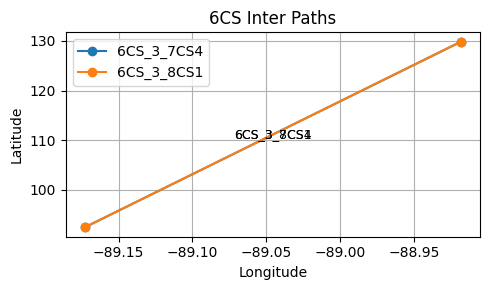

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
paths = {
    "6CS_3_7CS4": {
        "target1": (-89.17297316749628, 92.36041966345076),
        "target2": (-88.91792130895709, 129.870229577937),
        "min_mark": "6CS_3_7CS4"
    },
    "6CS_3_8CS1": {
        "target1": (-89.17297316749628, 92.36041966345076),
        "target2": (-88.91815629332577, 129.8664129556896),
        "min_mark": "6CS_3_8CS1"
    },
}
fig2 = plt.figure(figsize=(5, 3))

# Plot each path and label it
for label, data in paths.items():
    x_values = [data["target1"][0], data["target2"][0]]
    y_values = [data["target1"][1], data["target2"][1]]

    # Plot the line
    plt.plot(x_values, y_values, marker='o', label=label)

    # Calculate midpoint for label
    mid_x = sum(x_values) / 2
    mid_y = sum(y_values) / 2

    # Annotate with min_mark
    plt.text(mid_x, mid_y, data["min_mark"], fontsize=9, ha='center', va='center')

# Title and labels
plt.title("6CS Inter Paths")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()
# Save the figure
fig2.savefig('6CS_inter_paths.png')

# Download the figure
files.download('6CS_inter_paths.png')

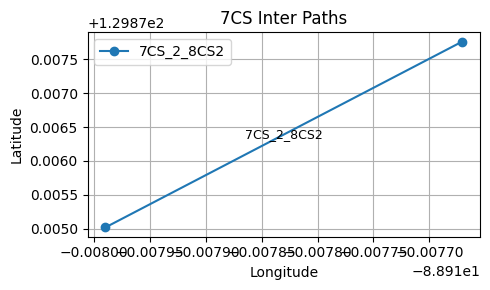

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
paths = {
    "7CS_2_8CS2": {
        "target1": (-88.91798982040464, 129.87501849471235),
        "target2": (-88.91767063992808, 129.87776283980352),
        "min_mark": "7CS_2_8CS2"
    },
}
fig3 = plt.figure(figsize=(5, 3))

# Plot each path and label it
for label, data in paths.items():
    x_values = [data["target1"][0], data["target2"][0]]
    y_values = [data["target1"][1], data["target2"][1]]

    # Plot the line
    plt.plot(x_values, y_values, marker='o', label=label)

    # Calculate midpoint for label
    mid_x = sum(x_values) / 2
    mid_y = sum(y_values) / 2

    # Annotate with min_mark
    plt.text(mid_x, mid_y, data["min_mark"], fontsize=9, ha='center', va='center')

# Title and labels
plt.title("7CS Inter Paths")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()
# Save the figure
fig3.savefig('7CS_inter_paths.png')

# Download the figure
files.download('7CS_inter_paths.png')

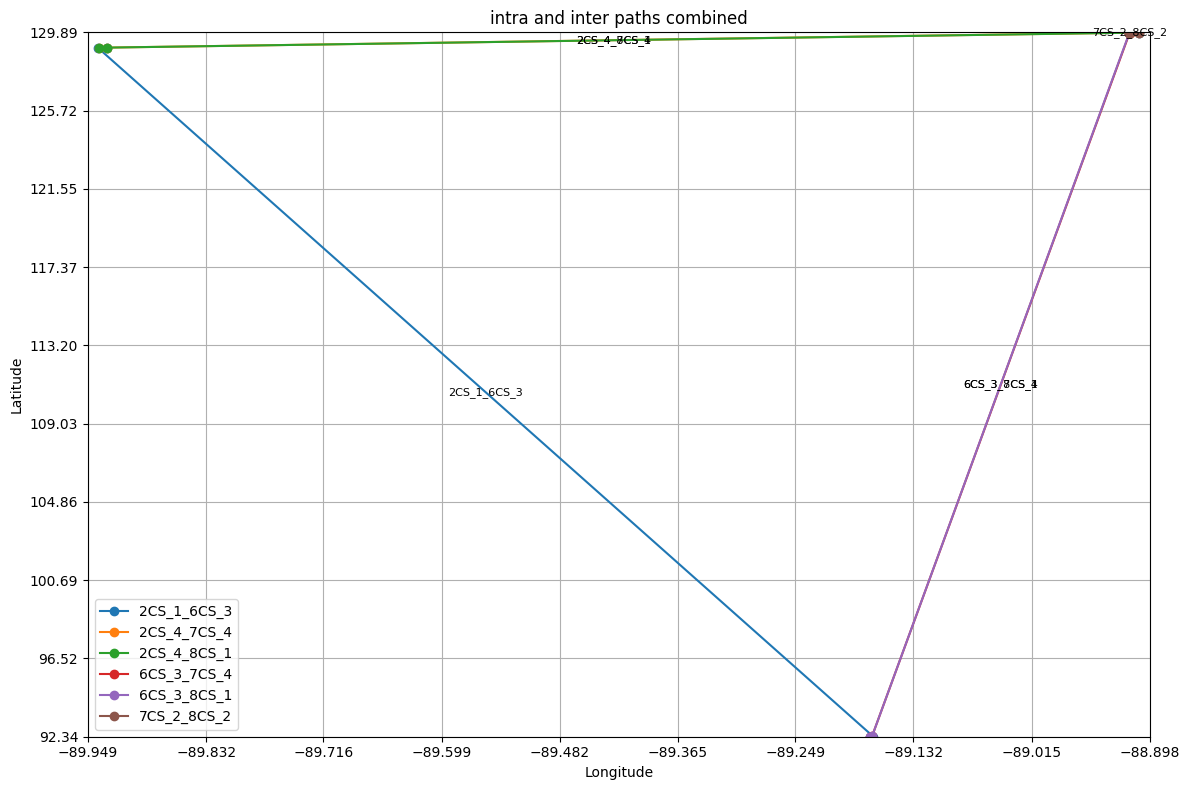

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Coordinate paths: Source1 → Target1 → Target2 → Source2
paths = {
    "2CS_1_6CS_3": [(-89.9303, 129.0697), (-89.9392, 129.0601), (-89.1718, 92.3547), (-89.1749, 92.3539)],
    "2CS_4_7CS_4": [(-89.9303, 129.0697), (-89.9387, 129.0671), (-88.9179, 129.8702), (-88.9189, 129.8719)],
    "2CS_4_8CS_1": [(-89.9303, 129.0697), (-89.9387, 129.0671), (-88.9182, 129.8664), (-88.9085, 129.8613)],
    "6CS_3_7CS_4": [(-89.1749, 92.3539), (-89.1730, 92.3604), (-88.9179, 129.8702), (-88.9189, 129.8719)],
    "6CS_3_8CS_1": [(-89.1749, 92.3539), (-89.1730, 92.3604), (-88.9182, 129.8664), (-88.9085, 129.8613)],
    "7CS_2_8CS_2": [(-88.9189, 129.8719), (-88.9187, 129.8750), (-88.9177, 129.8778), (-88.9085, 129.8613)],
}

# Plotting
fig = plt.figure(figsize=(12, 8)) # Assign the figure to 'fig'

for path_id, coords in paths.items():
    x_vals = [pt[0] for pt in coords]
    y_vals = [pt[1] for pt in coords]

    plt.plot(x_vals, y_vals, marker='o', label=path_id)

    # Label at midpoint
    mid_x = (x_vals[1] + x_vals[2]) / 2
    mid_y = (y_vals[1] + y_vals[2]) / 2
    plt.text(mid_x, mid_y, path_id, fontsize=8, ha='center', va='center')

# Axis labels and limits
plt.title("intra and inter paths combined")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Set scale with margin and 3-decimal precision
all_x = [pt[0] for coords in paths.values() for pt in coords]
all_y = [pt[1] for coords in paths.values() for pt in coords]
x_min, x_max = min(all_x) - 0.01, max(all_x) + 0.01
y_min, y_max = min(all_y) - 0.01, max(all_y) + 0.01

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(np.round(np.linspace(x_min, x_max, 10), 3))
plt.yticks(np.round(np.linspace(y_min, y_max, 10), 3))

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Save the figure
fig.savefig('intra_inter_paths_combined.png')

# Download the figure
files.download('intra_inter_paths_combined.png')